Show correlation over time between the S&P500and Nasdaq.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def get_returns(file):
    """
    This function reads a datafile from disk and returns percentage returns
    """
    return pd.read_csv(file+".csv", index_col=0, parse_dates=True).pct_change()

df = get_returns('SP500')

In [5]:
df.head()

,SP500
Date,
2009-06-23,NaN
2009-06-24,0.006524
2009-06-25,0.021444
2009-06-26,-0.001478
2009-06-29,0.009065


In [6]:
# add col for Nasdaq
df['NDX'] = get_returns('NDX')

In [7]:
df.head()

,SP500,NDX
Date,,
2009-06-23,NaN,-0.001507
2009-06-24,0.006524,0.015866
2009-06-25,0.021444,0.019875
2009-06-26,-0.001478,0.002968
2009-06-29,0.009065,0.002452


In [9]:
df.tail()

,SP500,NDX
Date,,
2018-07-27,-0.006562,-0.014048
2018-07-30,-0.005754,-0.014209
2018-07-31,0.004885,0.005405
2018-08-01,-0.001040,0.005656
2018-08-02,0.004926,0.013648


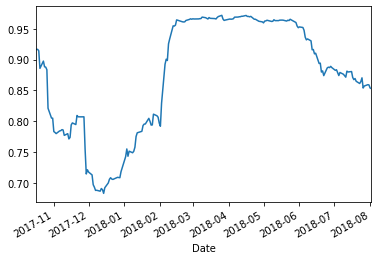

In [8]:
# calculate correlations, plot the last 200 data points

# apply correlation formula on rolling 50 day window of the percentag returns for the indexes
# discard all data except last 200 rows
# plot
df['SP500'].rolling(50).corr(df['NDX'])[-200:].plot()

### Prettier graphs

This time, we will 
1. Show a rebased comparison the S&P500 and Nasdaq, recalculated with the same starting value of 1.
2. Relative strength of Nasdqa to the S&P500 
3. Correlation between the two.

In [13]:
def get_data(file):
    df = pd.read_csv(file+'.csv', index_col='Date', parse_dates=['Date'])
    return df

def calc_corr(ser1, ser2, window):
    """
    Calculates correlation between two series.
    """
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

In [14]:
# get the log return data
df = get_data('indexes')
df.head()

,SP500,NDX
Date,,
1990-01-02,359.69,227.725
1990-01-03,358.76,226.100
1990-01-04,355.67,224.715
1990-01-05,352.20,223.140
1990-01-08,353.79,223.540


In [17]:
# define how many points we want to plot (trading days)
points_to_plot = 300

# rebase the two series to the same point in time,
# this will be plot start
for ind in df:
    """
    Loop through each column, slice last 300 points,
    get percent return of one col at a time, add 1.
    Then calculate cumulative product.
    """
    df[ind+'_rebased'] = (df[-points_to_plot:][ind].pct_change() + 1).cumprod()
    

In [19]:
df.tail()

,SP500,NDX,SP500_rebased,NDX_rebased
Date,,,,
2018-07-27,2818.82,7296.781,1.167179,1.262774
2018-07-30,2802.60,7193.103,1.160463,1.244832
2018-07-31,2816.29,7231.983,1.166132,1.251560
2018-08-01,2813.36,7272.887,1.164919,1.258639
2018-08-02,2827.22,7372.148,1.170658,1.275817


In [20]:
# relative strength, NDX to SP500
df['rel_str'] = df['NDX'] / df['SP500']

# calculate 50 day rolling correlation
df['corr'] = calc_corr(df['NDX'], df['SP500'], 100)

In [21]:
df.tail()

,SP500,NDX,SP500_rebased,NDX_rebased,rel_str,corr
Date,,,,,,
2018-07-27,2818.82,7296.781,1.167179,1.262774,2.588594,0.939082
2018-07-30,2802.60,7193.103,1.160463,1.244832,2.566582,0.938597
2018-07-31,2816.29,7231.983,1.166132,1.251560,2.567911,0.938573
2018-08-01,2813.36,7272.887,1.164919,1.258639,2.585125,0.935668
2018-08-02,2827.22,7372.148,1.170658,1.275817,2.607561,0.935795


In [22]:
# discard all but last 300 data points
plot_df = df[-points_to_plot:]

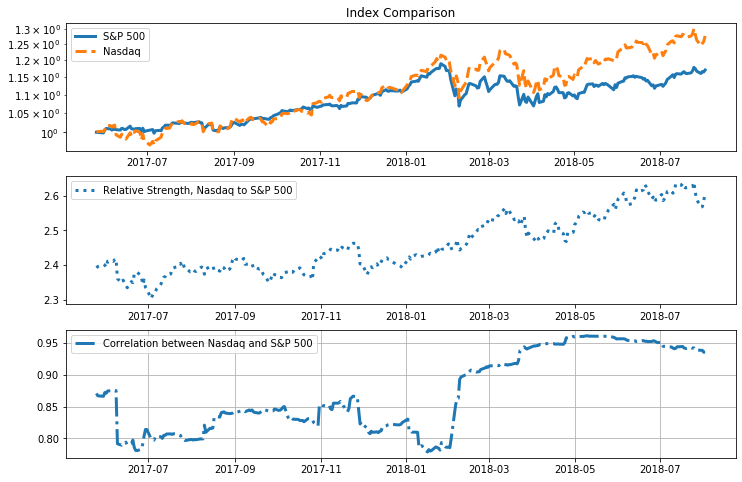

In [28]:
fig = plt.figure(figsize=(12,8))

# first subplot: 3 high / 1 wide / 1st
ax = fig.add_subplot(311)
ax.set_title('Index Comparison')
ax.semilogy(plot_df['SP500_rebased'], linestyle='-', 
            label='S&P 500', linewidth=3.0)
ax.semilogy(plot_df['NDX_rebased'], linestyle='--', 
            label='Nasdaq', linewidth=3.0)
ax.legend()
ax.grid(False)

# second subplot: 3 high / 1 wide / 2nd
ax = fig.add_subplot(312)
ax.plot(plot_df['rel_str'], 
        label='Relative Strength, Nasdaq to S&P 500',
        linestyle=":", linewidth=3.0)
ax.legend()
ax.grid(False)

# third subplot: 3 high / 1 wide / 3rd
ax = fig.add_subplot(313)
ax.plot(plot_df['corr'], 
        label='Correlation between Nasdaq and S&P 500',
        linestyle="-.", linewidth=3.0)
ax.legend()
ax.grid(True)